# FINAL PROJECT

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [17]:
df = pd.read_csv("loan_train.csv")

In [18]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [19]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


# Preprocessing and Cleaning Data

In [21]:
df["due_date"] = pd.to_datetime(df["due_date"])
df["effective_date"] = pd.to_datetime(df["effective_date"])

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [24]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [25]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


In [27]:
new_df = df[['Principal','terms','age','Gender','weekend']]
new_df = pd.concat([new_df,pd.get_dummies(df['education'])], axis=1)
new_df.drop(['Master or Above'], axis = 1,inplace=True)
new_df.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


In [33]:
x =new_df
y = le.fit_transform(df["loan_status"])

# Modelling

In [36]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [81]:
accuracy = []
for i in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = knnmodel.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

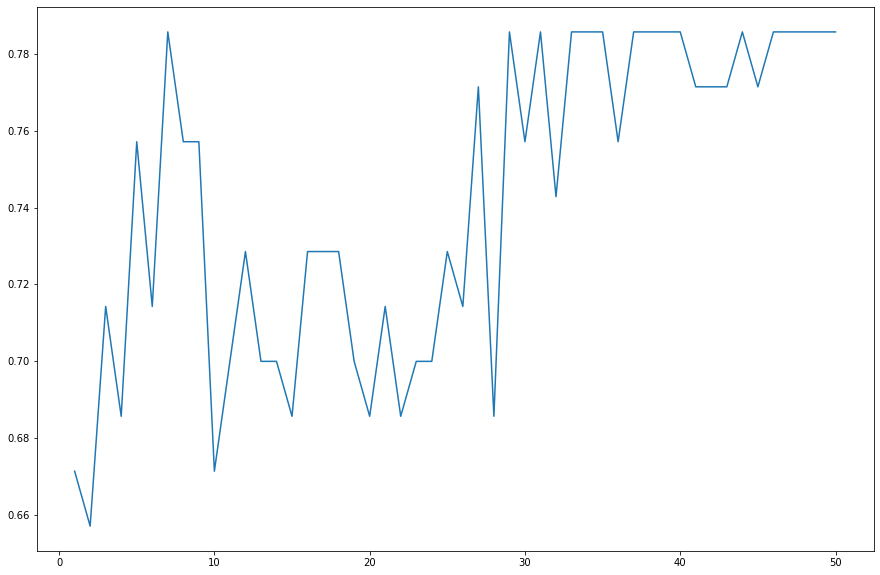

In [82]:
plt.figure(figsize=(15,10))
plt.plot(range(1,51),accuracy)

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [85]:
y_pred=dtmodel.predict(X_test)
Accuracy=metrics.accuracy_score(y_test,y_pred)
Accuracy

0.7714285714285715

# SVM

In [86]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [87]:
y_pred=svmmodel.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [88]:
metrics.accuracy_score(y_test,y_pred)

0.7428571428571429

# Logistic regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel = LogisticRegression().fit(X_train,y_train)

In [112]:
y_pred = lrmodel.predict(X_test)

In [113]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [114]:
metrics.accuracy_score(y_test,y_pred)

0.7285714285714285

In [141]:
print(lrmodel.predict_proba(X_test))

[[0.51845689 0.48154311]
 [0.38663558 0.61336442]
 [0.02326667 0.97673333]
 [0.03501101 0.96498899]
 [0.02344812 0.97655188]
 [0.0273295  0.9726705 ]
 [0.45665682 0.54334318]
 [0.41607128 0.58392872]
 [0.03501101 0.96498899]
 [0.45828046 0.54171954]
 [0.0323264  0.9676736 ]
 [0.45333621 0.54666379]
 [0.01662574 0.98337426]
 [0.03995494 0.96004506]
 [0.28127121 0.71872879]
 [0.01012531 0.98987469]
 [0.59966943 0.40033057]
 [0.01876212 0.98123788]
 [0.47386304 0.52613696]
 [0.0268046  0.9731954 ]
 [0.26512852 0.73487148]
 [0.44312762 0.55687238]
 [0.55946092 0.44053908]
 [0.40446024 0.59553976]
 [0.2186388  0.7813612 ]
 [0.53902492 0.46097508]
 [0.5492637  0.4507363 ]
 [0.17231405 0.82768595]
 [0.48416408 0.51583592]
 [0.00700314 0.99299686]
 [0.35892096 0.64107904]
 [0.32507789 0.67492211]
 [0.42644675 0.57355325]
 [0.40285298 0.59714702]
 [0.22286862 0.77713138]
 [0.32187597 0.67812403]
 [0.47386304 0.52613696]
 [0.01466131 0.98533869]
 [0.34647167 0.65352833]
 [0.34574189 0.65425811]


# Modelling with test dataset

In [148]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [149]:
test_df = pd.read_csv("loan_test.csv")

In [150]:
df["due_date"] = pd.to_datetime(df["due_date"])
df["effective_date"] = pd.to_datetime(df["effective_date"])
df["Gender"] = le.fit_transform(df["Gender"])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
new_df = df[['Principal','terms','age','Gender','weekend']]
new_df = pd.concat([new_df,pd.get_dummies(df['education'])], axis=1)
new_df.drop(['Master or Above'], axis = 1,inplace=True)

In [151]:
xtest =new_df
ytest = le.fit_transform(df["loan_status"])

In [152]:
xtest

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,1,1,0,1,0
342,1000,30,25,1,1,0,1,0
343,800,15,39,1,0,0,0,1
344,1000,30,28,1,0,0,0,1


In [153]:
ytest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [154]:
y_pred_knn=knnmodel.predict(xtest)
y_pred_dt=dtmodel.predict(xtest)
y_pred_svm=svmmodel.predict(xtest)
y_pred_lr=lrmodel.predict(xtest)
y_pred_lr_proba=lrmodel.predict_proba(xtest)

In [155]:
print(f1_score(ytest,y_pred_knn))
print(f1_score(ytest,y_pred_dt))
print(f1_score(ytest,y_pred_svm))
print(f1_score(ytest,y_pred_lr))

0.858085808580858
0.6505494505494505
0.858085808580858
0.858085808580858


In [156]:
print(jaccard_score(ytest,y_pred_knn))
print(jaccard_score(ytest,y_pred_dt))
print(jaccard_score(ytest,y_pred_svm))
print(jaccard_score(ytest,y_pred_lr))


0.7514450867052023
0.4820846905537459
0.7514450867052023
0.7514450867052023


In [157]:
m_log_loss=log_loss(ytest,y_pred_lr_proba)
m_log_loss

8.584782572145526